# Feature engineering with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


## The machine learning pipeline

Machine learning models expect numeric arrays, but data in the real world is in many different forms...


![so we need to go from one to the other!](https://editor.analyticsvidhya.com/uploads/31896diagram.png)

From [Feature engineering with Python](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/)

## Let's play!

We will try to guess a players' position

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.options.display.max_columns = None
players = pd.read_csv('/home/dsc/data/fifa/players_20.csv', index_col = 0)
players.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,

https://fifafootballvideogames.fandom.com/wiki/Soccer_positions

So, to begin with, we need to extract a target feature.


#### Exercise

Generate the target feature from `player_positions`. For convenience, have the following key:

```python
key = {'CF': 'forward',  'RF': 'forward',  'LF': 'forward',  'ST': 'forward', 
       'DM': 'midfielder',  'LW': 'midfielder',  'RW': 'midfielder',  'LM': 'midfielder',  
       'RM': 'midfielder',  'CM': 'midfielder',  'AM': 'midfielder',  'CAM': 'midfielder',  
       'CDM': 'midfielder', 'SW': 'defense',  'RWB': 'defense',  
       'LWB': 'defense',  'RB': 'defense',  'LB': 'defense',  'CB': 'defense',
       'GK': 'goalkeeper'}
```

Hints: consider the `.str` string methods accessor of pandas Series.

In [12]:
players['player_positions'].value_counts()

CB              2322
GK              2036
ST              1809
CM               786
CDM, CM          731
                ... 
LM, LWB, CM        1
CAM, CDM, CB       1
RM, LB             1
LB, CDM, LWB       1
RM, ST, CM         1
Name: player_positions, Length: 643, dtype: int64

In [17]:
(players['player_positions'].str.contains('ST') |
players['player_positions'].str.contains('CF') |
players['player_positions'].str.contains('LF') |
players['player_positions'].str.contains('RF'))

sofifa_id
158023     True
20801      True
190871    False
200389    False
183277     True
          ...  
245006    False
250995    False
252332    False
251110    False
233449    False
Name: player_positions, Length: 18278, dtype: bool

In [83]:
target = players['player_positions'].str.contains('ST|CF|LF|RF')
data = players[['international_reputation','weak_foot','skill_moves', 'nationality']]
data

,international_reputation,weak_foot,skill_moves,nationality
sofifa_id,,,,
158023,5,4,4,Argentina
20801,5,4,5,Portugal
190871,5,5,5,Brazil
200389,3,3,1,Slovenia
183277,4,4,4,Belgium
...,...,...,...,...
245006,1,3,2,China PR
250995,1,2,2,China PR
252332,1,2,2,China PR


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import sklearn

sklearn.set_config(display='diagram')

#imputer es un fillna adaptado, para luego no pillarnos los dedos con los na
pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('classifier', RandomForestClassifier())])
#donde halla na metera la mediana

pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('classifier', RandomForestClassifier())])

In [27]:
demo = pd.DataFrame({'x':[np.nan,2,1,2,3,3,np.nan, np.nan],
                     'y':[np.nan,np.nan,10,10,11,11,12,np.nan]})
                    

demo

,x,y
0,NaN,NaN
1,2.0,NaN
2,1.0,10.0
3,2.0,10.0
4,3.0,11.0
5,3.0,11.0
6,NaN,12.0
7,NaN,NaN


In [28]:
demo_imputer = SimpleImputer(strategy='median')
demo_imputer.fit(demo.loc[:6])#training set
demo_imputer.transform(demo.iloc[6:])#test

array([[ 2., 12.],
       [ 2., 11.]])

acc: 0.812     recall: 0.0058     precision: 0.833     f1: 0.0115     auc: 0.672


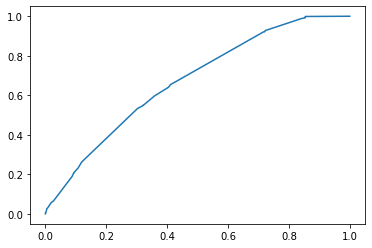

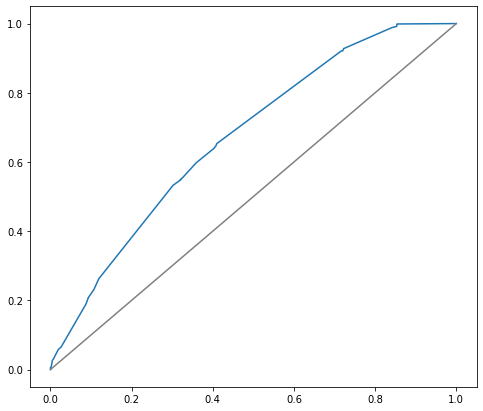

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve


def evaluate(estimator, data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target)

    estimator.fit(X_train,y_train)

    y_hat = estimator.predict(X_test)
    probs = estimator.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot(fpr, tpr)
    f, ax = plt.subplots(1,1)
    f.set_size_inches(8,7)
    ax.plot(fpr,tpr)
    ax.plot([0,1],[0,1],c='grey')

    print(f'acc: {accuracy_score(y_test,y_hat):.3} \
    recall: {recall_score(y_test,y_hat):.3} \
    precision: {precision_score(y_test,y_hat):.3} \
    f1: {f1_score(y_test,y_hat):.3} \
    auc: {roc_auc_score(y_test,probs):.3}')
    
evaluate(pipeline, data, target)

## Let's do a first approximation to use as baseline


We will set up our thing with sklearn pipelines for:

1. Convenience

2. Joint parameter selection

## Categorical variables

`nationality`, `club`

In [46]:
data['nationality'] = players['nationality']
evaluate(pipeline,data, target)

/tmp/ipykernel_3451/2972297196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nationality'] = players['nationality']


ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'France'

In [54]:
data = data.drop('nationality', axis=1)

### One hot Encoding
 
![One Hot Encoding](https://i.imgur.com/TW5m0aJ.png)


In [47]:
players['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

In [50]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

train, test = train_test_split(players[['team_position']])
encoder.fit(train)
result = encoder.transform(test)
result

<4570x30 sparse matrix of type '<class 'numpy.float64'>'
	with 4570 stored elements in Compressed Sparse Row format>

In [51]:
result[0].todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [52]:
encoder.categories_

[array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
        'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
        'RDM', 'RES', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB', nan],
       dtype=object)]

In [53]:
test.iloc[:3]

,team_position
sofifa_id,
252742,NaN
242280,RDM
240391,RES


In [58]:
pipeline = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                     ('imputer', SimpleImputer(strategy='median')),
                     ('classifier', RandomForestClassifier())])

pipeline

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('imputer', SimpleImputer(strategy='median')),
                ('classifier', RandomForestClassifier())])

In [59]:
pipeline.fit(data, target)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('imputer', SimpleImputer(strategy='median')),
                ('classifier', RandomForestClassifier())])

acc: 0.811     recall: 0.00346     precision: 1.0     f1: 0.0069     auc: 0.656


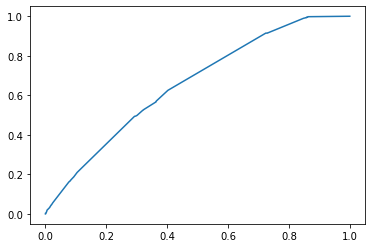

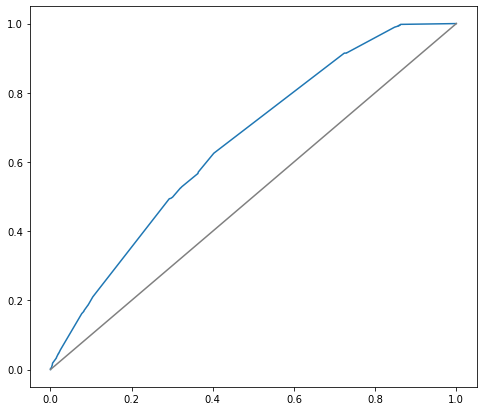

In [60]:
evaluate(pipeline, data, target)

In [64]:
players['nationality'].value_counts()[:20]

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
Brazil                  824
Italy                   732
Colombia                591
Japan                   453
Netherlands             416
China PR                373
Chile                   370
Sweden                  358
Norway                  350
Republic of Ireland     348
United States           347
Denmark                 345
Portugal                344
Mexico                  340
Poland                  324
Name: nationality, dtype: int64

In [67]:
forwards_per_country = target.groupby(players['nationality']).agg(['mean', 'count'])
forwards_per_country.sort_values(by='count',ascending=False)

,mean,count
nationality,,
England,0.194961,1667
Germany,0.170230,1216
Spain,0.176812,1035
France,0.178862,984
Argentina,0.215576,886
...,...,...
Malawi,1.000000,1
Mauritius,0.000000,1
St Lucia,0.000000,1


In [82]:
categories = forwards_per_country.sort_values(by='count', ascending=False)[:20].index
pipeline = Pipeline([('onehotencoder', OneHotEncoder(categories='categories',handle_unknown='ignore')),
                     ('imputer', SimpleImputer(strategy='median')),
                     ('classifier', RandomForestClassifier())])

evaluate(pipeline, data, target)

Index(['international_reputation', 'weak_foot', 'skill_moves'], dtype='object')

acc: 0.793     recall: 0.022     precision: 0.27     f1: 0.0406     auc: 0.658


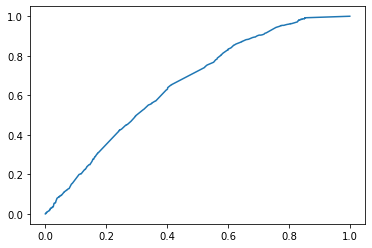

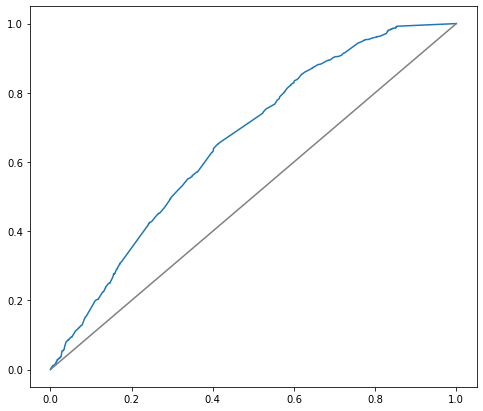

In [92]:
from sklearn.compose import ColumnTransformer

numeric_columns = data.select_dtypes('number').columns

nat_preproc = ColumnTransformer([('nationality_encoder', 
                                      OneHotEncoder(handle_unknown='ignore', 
                                                categories=(categories,)),
                                      ['nationality']),
                                  ('imputer',
                                       SimpleImputer(strategy='median'),
                                       numeric_columns)])

pipeline = Pipeline([('nat_preproc', nat_preproc),
                    ('classifier', RandomForestClassifier())])

evaluate(pipeline, data, target)

This would work okay, but what about nationalities?

The least common nationalities have 1 or 2 players. That is absolutely not informative. One strategy we can use in these situations is to keep only the most common categories, and do a grab-bag for the rest.

### Target encoding

Also known as bin counting


With high cardinality discrete data like user_ids we would be left with many variables by one hot encoding, most of which would not be very informative. There are [several options](https://www.datacamp.com/community/tutorials/encoding-methodologies) to deal with this. The most sophisticated is probably vector encoding, about which you'll learn more in the NLP module, but we can do with a very simple approach: [target encoding](https://maxhalford.github.io/blog/target-encoding/).


In [86]:
players['club'].nunique()

698

In [88]:
#target.groupby(players['club']).transform('mean')
target.groupby(players['club']).agg('mean')

sofifa_id
158023    0.121212
20801     0.121212
190871    0.151515
200389    0.272727
183277    0.212121
            ...   
245006    0.107143
250995    0.250000
252332    0.115385
251110    0.178571
233449    0.115385
Name: player_positions, Length: 18278, dtype: float64

In [89]:
from category_encoders import TargetEncoder

from sklearn.compose import ColumnTransformer

numeric_columns = data.select_dtypes('number').columns

nat_preproc = ColumnTransformer([('nationality_encoder', 
                                      OneHotEncoder(handle_unknown='ignore', 
                                                categories=(categories,)),
                                      ['nationality']),
                                  ('club_encoder',
                                      TargetEncoder(),
                                      ['club']),
                                  ('imputer',
                                      SimpleImputer(strategy='median'),
                                      numeric_columns)])

pipeline = Pipeline([('nat_preproc', nat_preproc),
                    ('classifier', RandomForestClassifier())])

evaluate(pipeline, data, target)



## Text

You will learn a lot more in the NLP and Deep Learning sections, but let me show you a few basics.

### The lame approach

`work_rate`

In [103]:
def encode(work_rate):
    work_rate_code = {'Low': 1, 'Medium': 2, 'High': 3}
    return work_rate_code[work_rate]

data['attack'] = players['work_rate'].str.split('/').str[0].apply(encode)
data['defense'] = players['work_rate'].str.split('/').str[1].apply(encode)

data.head()

/tmp/ipykernel_3451/2134078639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['attack'] = players['work_rate'].str.split('/').str[0].apply(encode)
/tmp/ipykernel_3451/2134078639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['defense'] = players['work_rate'].str.split('/').str[1].apply(encode)


,international_reputation,weak_foot,skill_moves,nationality,attack,defense
sofifa_id,,,,,,
158023,5,4,4,Argentina,2,1
20801,5,4,5,Portugal,3,1
190871,5,5,5,Brazil,3,2
200389,3,3,1,Slovenia,2,2
183277,4,4,4,Belgium,3,2


acc: 0.801     recall: 0.0517     precision: 0.349     f1: 0.09     auc: 0.652


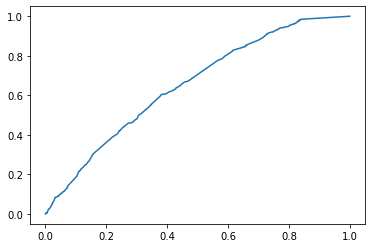

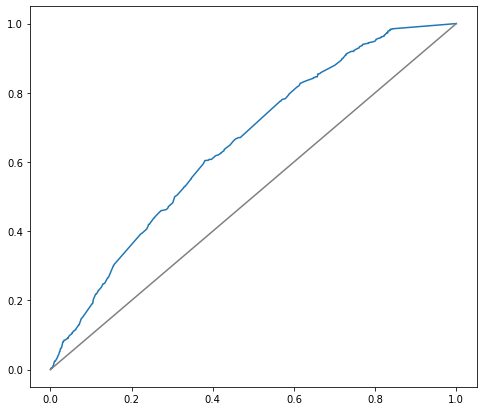

In [104]:
evaluate(pipeline, data, target)

### Bag-of-words

`player_traits`

`player_tags`

### Vector encodings for more than text


## Numerical variables

### Dealing with counts and money

Download https://www.kaggle.com/fernandol/countries-of-the-world

In [106]:
countries = pd.read_csv('/home/dsc/Downloads/countries of the world.csv')
countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


(array([183.,  21.,   8.,   4.,   2.,   3.,   1.,   1.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([7.02600000e+03, 2.62863597e+07, 5.25656935e+07, 7.88450272e+07,
        1.05124361e+08, 1.31403695e+08, 1.57683028e+08, 1.83962362e+08,
        2.10241696e+08, 2.36521030e+08, 2.62800363e+08, 2.89079697e+08,
        3.15359031e+08, 3.41638365e+08, 3.67917698e+08, 3.94197032e+08,
        4.20476366e+08, 4.46755700e+08, 4.73035033e+08, 4.99314367e+08,
        5.25593701e+08, 5.51873035e+08, 5.78152368e+08, 6.04431702e+08,
        6.30711036e+08, 6.56990370e+08, 6.83269703e+08, 7.09549037e+08,
        7.35828371e+08, 7.62107704e+08, 7.88387038e+08, 8.14666372e+08,
        8.40945706e+08, 8.67225039e+08, 8.93504373e+08, 9.19783707e+08,
        9.

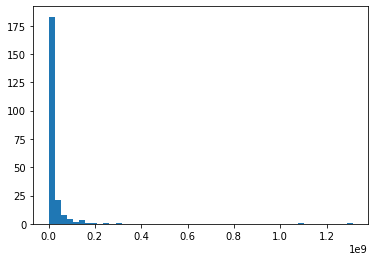

In [109]:
plt.hist(countries['Population'], bins=50)

(array([ 2.,  1.,  3.,  1.,  4.,  2.,  2.,  3.,  3.,  7.,  4.,  5.,  0.,
         7.,  2.,  6.,  4.,  8.,  2.,  4.,  4.,  5.,  2.,  6.,  6.,  8.,
        13., 11., 11., 13., 14.,  6.,  7.,  8.,  9.,  7.,  4.,  7.,  5.,
         1.,  4.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([3.84670815, 3.95214572, 4.05758329, 4.16302086, 4.26845843,
        4.373896  , 4.47933357, 4.58477114, 4.69020871, 4.79564628,
        4.90108385, 5.00652142, 5.11195899, 5.21739656, 5.32283413,
        5.4282717 , 5.53370928, 5.63914685, 5.74458442, 5.85002199,
        5.95545956, 6.06089713, 6.1663347 , 6.27177227, 6.37720984,
        6.48264741, 6.58808498, 6.69352255, 6.79896012, 6.90439769,
        7.00983526, 7.11527283, 7.22071041, 7.32614798, 7.43158555,
        7.53702312, 7.64246069, 7.74789826, 7.85333583, 7.9587734 ,
        8.06421097, 8.16964854, 8.27508611, 8.38052368, 8.48596125,
        8.59139882, 8.69683639, 8.80227397, 8.90771154, 9.01314911,
        9.11858668]),
 <BarContainer

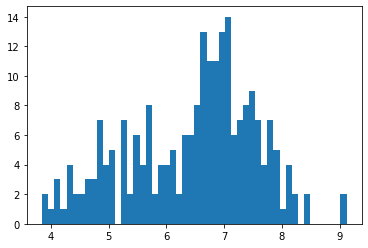

In [110]:
plt.hist(np.log10(countries['Population']), bins=50)

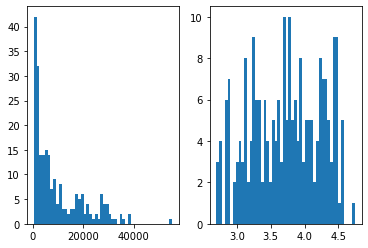

In [112]:
f, ax = plt.subplots(1,2)
ax[0].hist(countries['GDP ($ per capita)'], bins=50);
ax[1].hist(np.log10(countries['GDP ($ per capita)']), bins=50);

Download the csv from:

https://github.com/bnokoro/Data-Science/blob/7fe6edb692afbb6494694c2601c5c554522ea742/countries%20of%20the%20world.csv

### Scaling

Compare `age`, `height_cm`, `weight_kg` with the skill variables. What if we applied a KNN or a PCA?

In [113]:
players[['age', 'height_cm', 'weight_kg']]

,age,height_cm,weight_kg
sofifa_id,,,
158023,32,170,72
20801,34,187,83
190871,27,175,68
200389,26,188,87
183277,28,175,74
...,...,...,...
245006,22,186,79
250995,22,177,66
252332,19,186,75


### Ejercicio

Add a StandarScaler to our pipeline. Add 'age', 'height_cm' and 'weight_kg' to the data DataFrame.

In [124]:
numeric_columns = data.select_dtypes('number').columns

number_preproc = Pipeline([('imputer',
                                 SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

number_preproc

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [126]:
preproc = ColumnTransformer([('nationality_encoder', 
                                 OneHotEncoder(handle_unknown='ignore', 
                                               categories=(categories,)), 
                                 ['nationality']),
                           
                             ('club_encoder',
                                 TargetEncoder(),
                                 ['club']),
                            
                             ('number_preproc',
                                 number_preproc,
                                 numeric_columns)])

pipeline = Pipeline([('preproc', preproc),
                     ('classifier', RandomForestClassifier())])

pipeline

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('nationality_encoder',
                                                  OneHotEncoder(categories=(Index(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands', 'China PR', 'Chile', 'Sweden',
       'Norway', 'Republic of Ireland', 'United States', 'Denmark', 'Portugal',
       'Mexico', 'Poland'],
      dtype='object', name='nationality'),),
                                                                handle_unknown='ignore'),
                                                  ['nationality']),
                                                 ('club_encoder',
                                                  TargetEncoder(), ['club']),
                                                 ('number_preproc',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['international_reputation', 'weak_foot', 'skill_moves', 'attack',
       'defense'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

/home/dsc/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


acc: 0.779     recall: 0.251     precision: 0.368     f1: 0.299     auc: 0.67


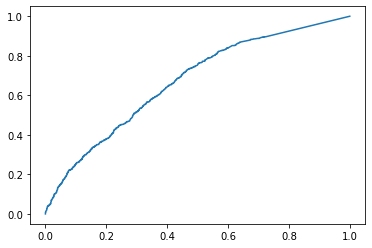

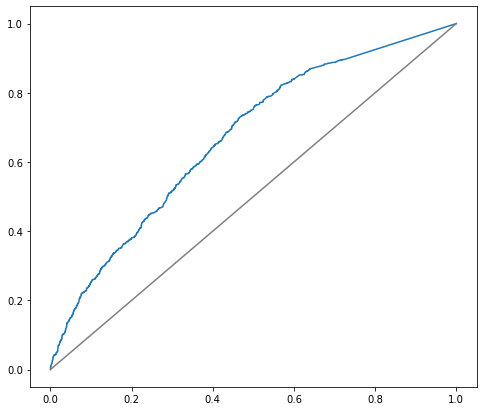

In [127]:
evaluate(pipeline, data, target)

In [116]:
from sklearn.preprocessing import StandardScaler

### Interaction features

Very useful for linear models. Decision models already have them for free.

In [130]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2)

polynomial.fit_transform(data.select_dtypes('number'))

array([[1., 5., 4., ..., 4., 2., 1.],
       [1., 5., 4., ..., 9., 3., 1.],
       [1., 5., 5., ..., 9., 6., 4.],
       ...,
       [1., 1., 2., ..., 1., 2., 4.],
       [1., 1., 2., ..., 1., 1., 1.],
       [1., 1., 3., ..., 4., 4., 4.]])

A linear model will do a terrible job fitting data that has nonlinearities: logs, multiplications, etc.

We can give it a hand by adding nonlinear features:

In sklearn:

### Target encoding in `sklearn` pipelines

There is no target encoder estimator in sklearn. We can install an additional library or, even more fun, roll our own!

This is how you install the additional library:

```bash
!conda install -c conda-forge category_encoders
```

Then:

## Further reading


[Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235): a great book covering all the basics.

[Why is feature scaling required?](https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93players1af310)

[When to standardize?](https://statmodeling.stat.columbia.edu/2009/07/11/when_to_standar/)

[Representing Categorical Data with Target Encoding](https://brendanhasz.github.io/2019/03/04/target-encoding)


[A Simple Guide to Scikit-learn Pipelines](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)

[scikit-learn for developers](https://scikit-learn.org/stable/developers/develop.html)

[The Categorical Encoders library](https://contrib.scikit-learn.org/category_encoders/)

[Creating your own estimator in scikit-learn](http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/)